# EDA – Análise Exploratória dos Dados

#### Nossa empresa está estudando iniciar a produção de vinhos para o próximo período, com o compromisso de entrar no mercado de forma competitiva e disputar espaço lado a lado com as maiores produtoras do Brasil.

#### Para isso, nossa equipe de cientistas de dados será responsável por analisar o dataset disponível e extrair insights valiosos que orientem a tomada de decisão baseada em dados.

#### Sabemos que é um grande desafio, mas estamos preparados para enfrentá-lo e oferecer as melhores recomendações a partir das análises realizadas, contribuindo para o desenvolvimento de uma safra de alta qualidade.

In [18]:
# Lib
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Module
from analise_qualidade_vinhos.data.dataset import load_raw_data
from analise_qualidade_vinhos.utils.file_paths import get_file_path
from analise_qualidade_vinhos.visualization.graficos import grafo_bloco_boxplot, grafo_heatmap, grafo_dist_boxplot

In [8]:
input_path = get_file_path(filename_or_path='df_analisis.csv', folder="processed")
#df = get_data(source_type='csv', type_name='processed', filename_or_path=input_path)
df = load_raw_data(path=input_path, sep=',')
df

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [9]:
# Dimensões básicas do data frame
print(f'Dataset Vinho\nLinhas: {df.shape[0]} \nCounas: {df.shape[1]}')

Dataset Vinho
Linhas: 1599 
Counas: 12


In [10]:
# Informações do tipos de dados do nosso dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         1599 non-null   float64
 1   volatile_acidity      1599 non-null   float64
 2   citric_acid           1599 non-null   float64
 3   residual_sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free_sulfur_dioxide   1599 non-null   float64
 6   total_sulfur_dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   ph                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [11]:
# Averiguando valores nulos
print(f'Valores nulos: {df.isnull().sum().sum()} valor(es) nulo(s)')

Valores nulos: 0 valor(es) nulo(s)


In [13]:
# Mostra estátisticas básicas de nosso dataframe como (média, mediana, desvio padrão, quartis, max, min, count)
df.iloc[:, :11].describe().round(2)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol
count,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00
mean,8.32,0.53,0.27,2.54,0.09,15.87,46.47,1.00,3.31,0.66,10.42
std,1.74,0.18,0.19,1.41,0.05,10.46,32.90,0.00,0.15,0.17,1.07
min,4.60,0.12,0.00,0.90,0.01,1.00,6.00,0.99,2.74,0.33,8.40
25%,7.10,0.39,0.09,1.90,0.07,7.00,22.00,1.00,3.21,0.55,9.50
50%,7.90,0.52,0.26,2.20,0.08,14.00,38.00,1.00,3.31,0.62,10.20
75%,9.20,0.64,0.42,2.60,0.09,21.00,62.00,1.00,3.40,0.73,11.10
max,15.90,1.58,1.00,15.50,0.61,72.00,289.00,1.00,4.01,2.00,14.90



📊 Análise da coluna: fixed_acidity


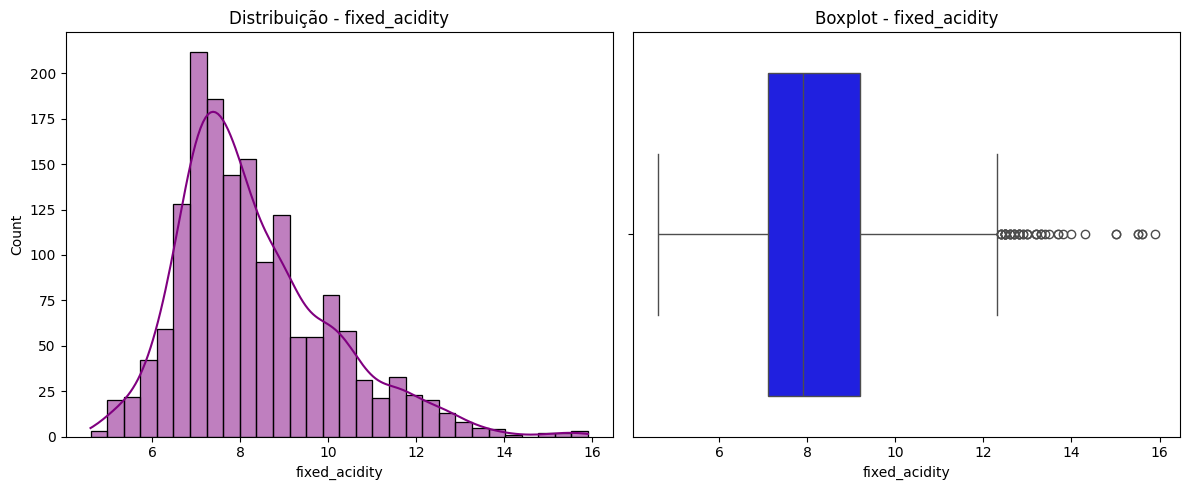


📊 Análise da coluna: volatile_acidity


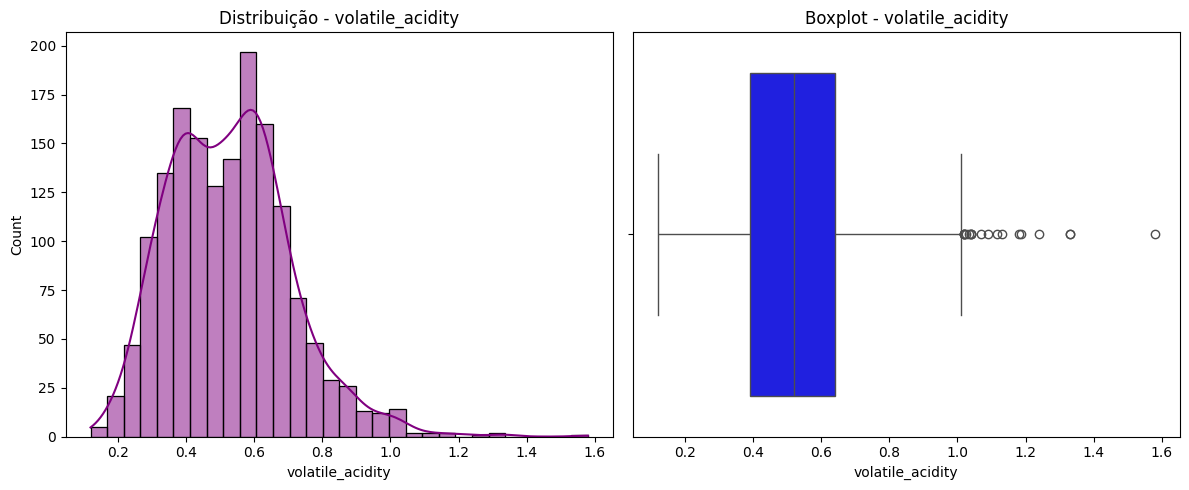


📊 Análise da coluna: citric_acid


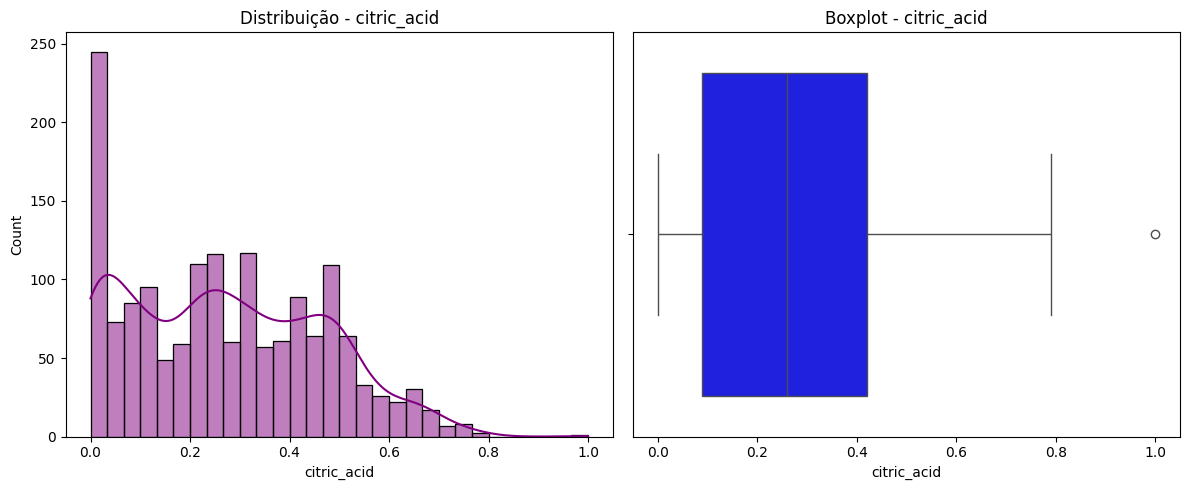


📊 Análise da coluna: residual_sugar


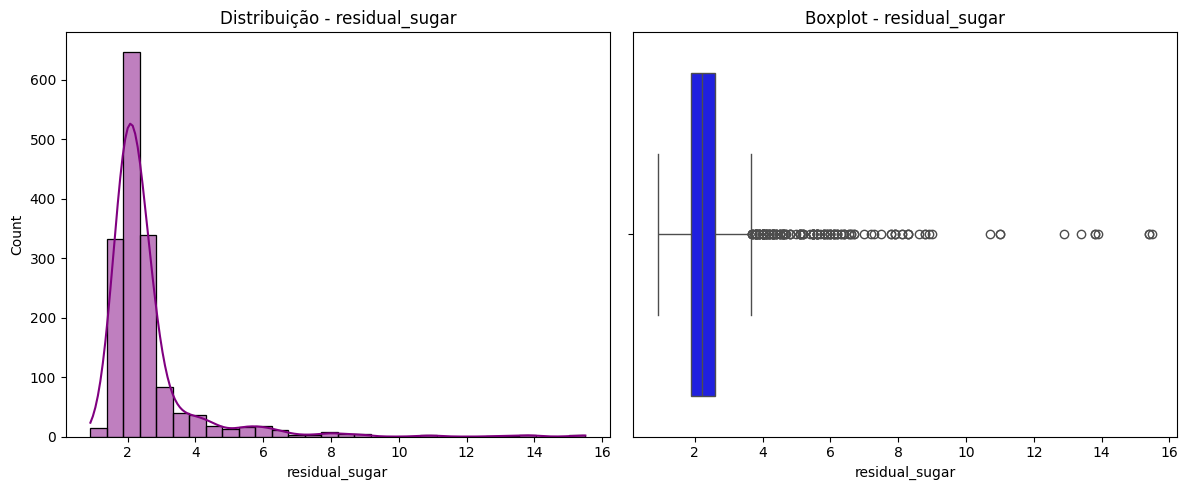


📊 Análise da coluna: chlorides


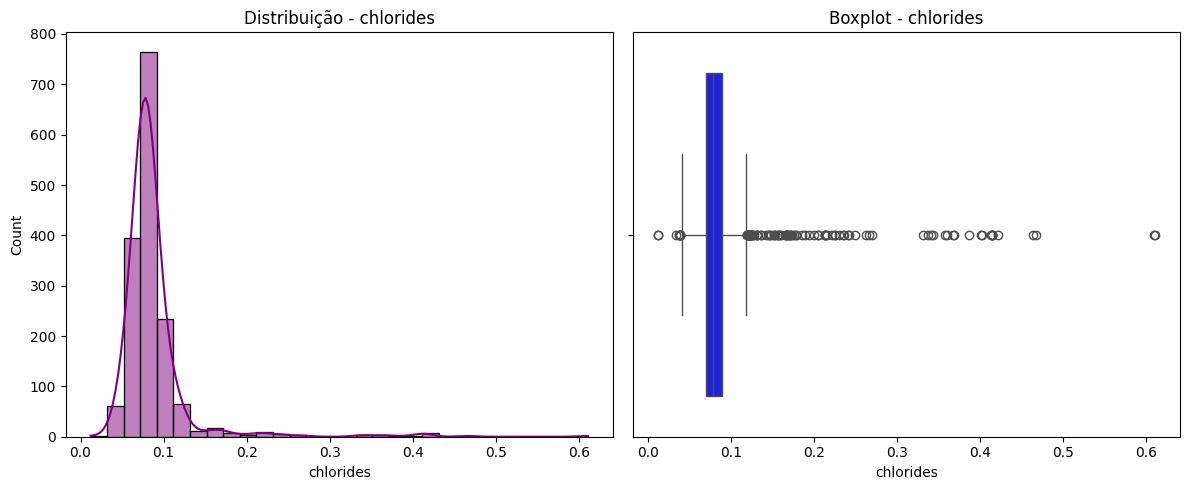


📊 Análise da coluna: free_sulfur_dioxide


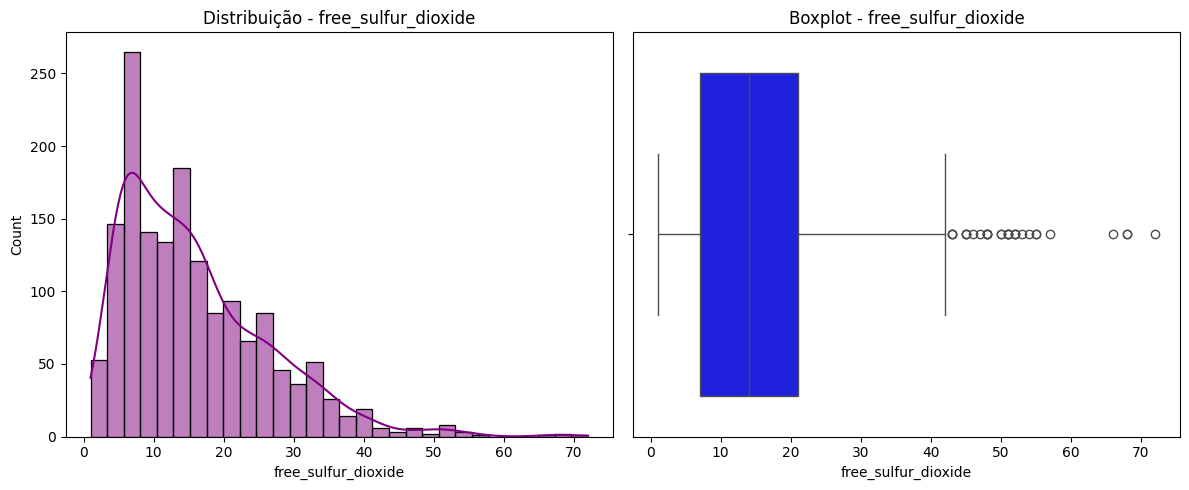


📊 Análise da coluna: total_sulfur_dioxide


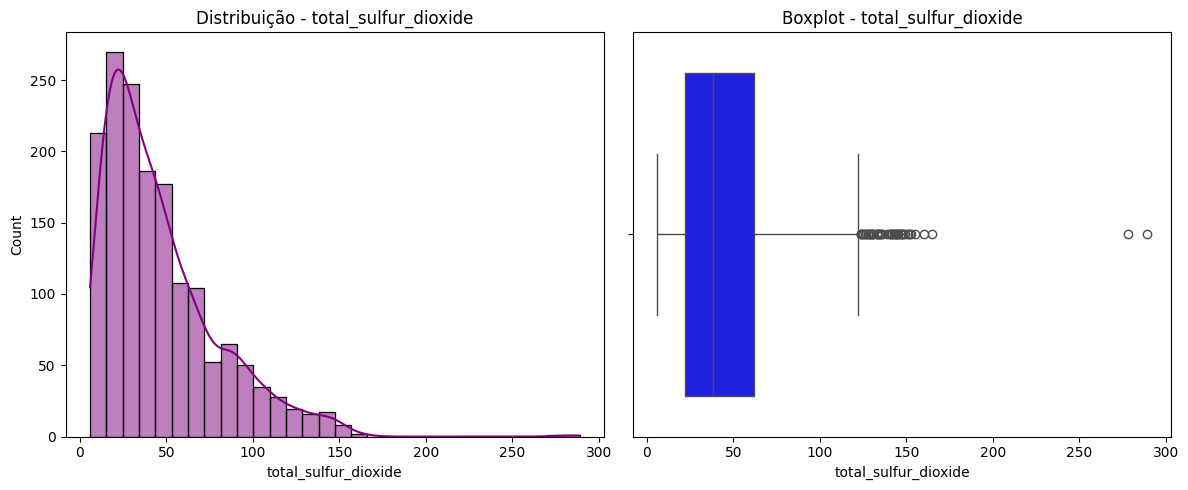


📊 Análise da coluna: density


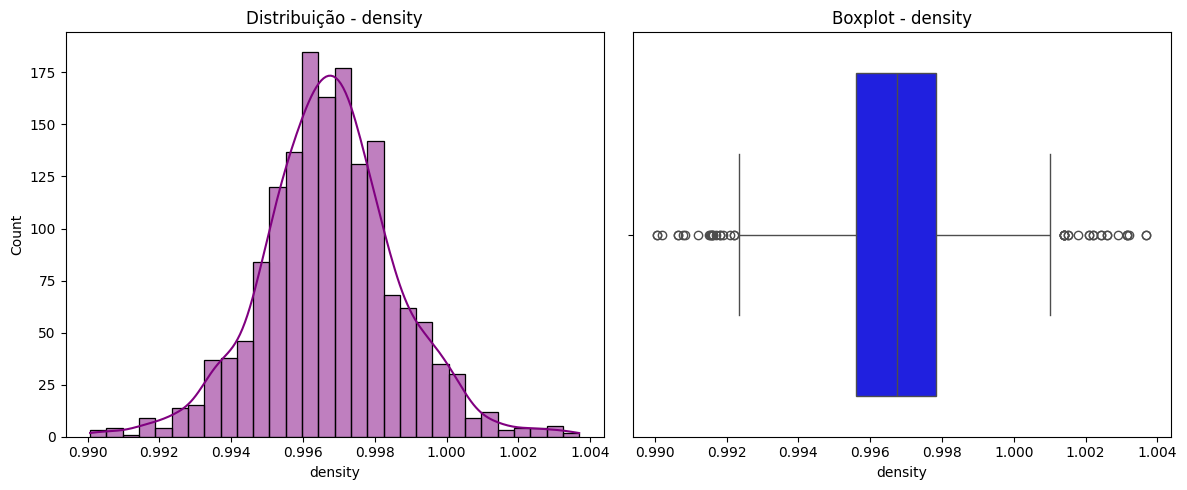


📊 Análise da coluna: ph


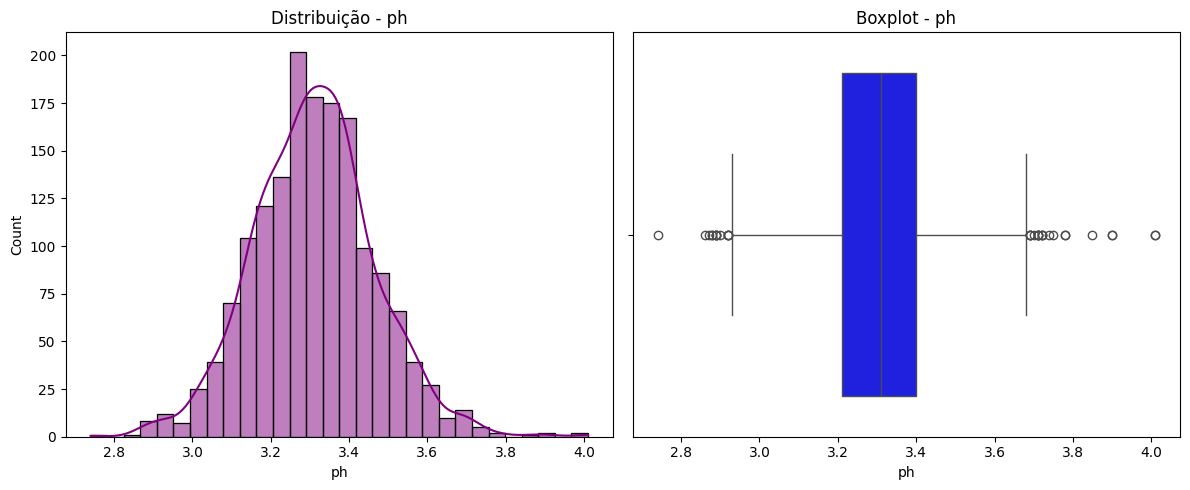


📊 Análise da coluna: sulphates


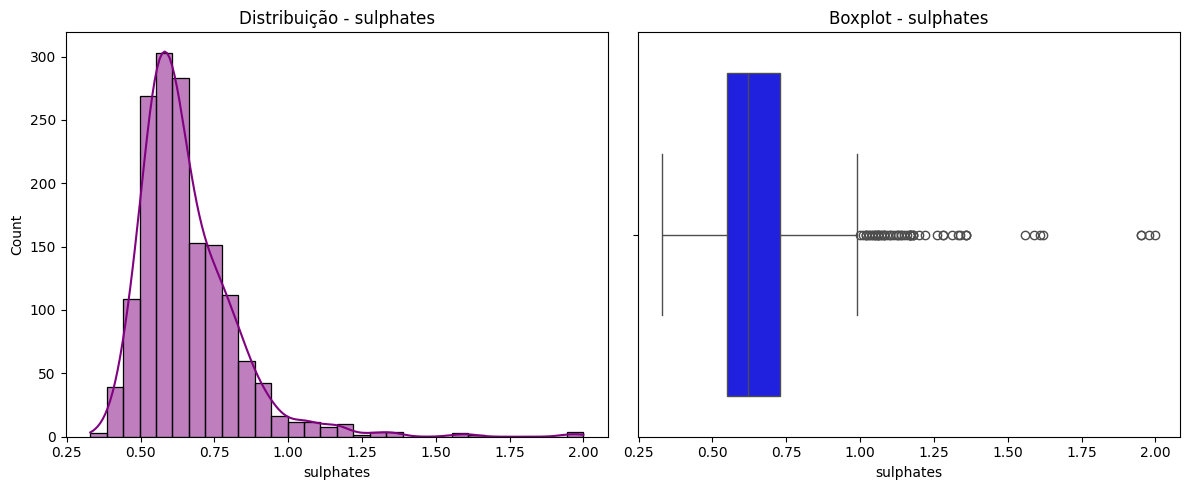


📊 Análise da coluna: alcohol


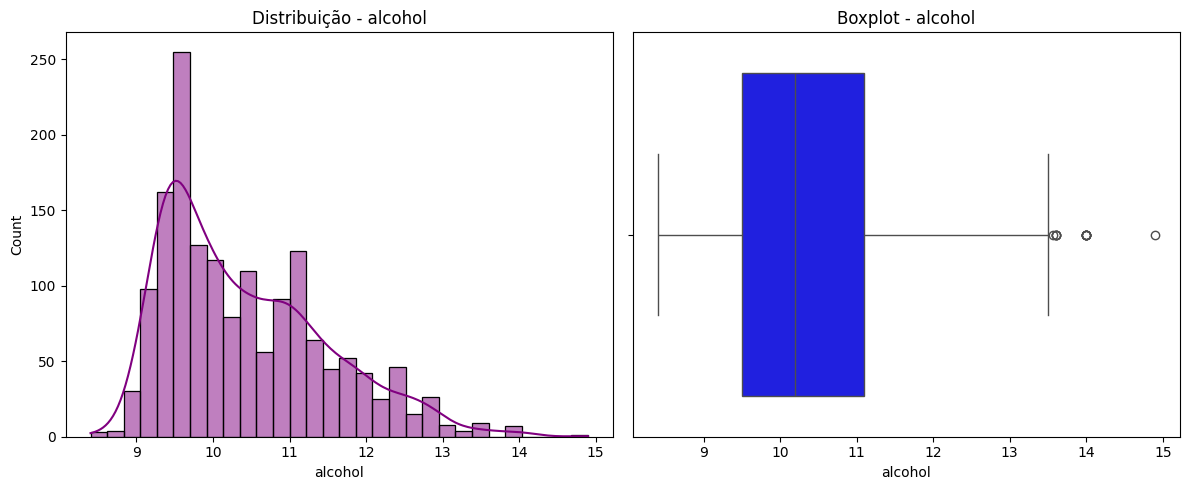


📊 Análise da coluna: quality


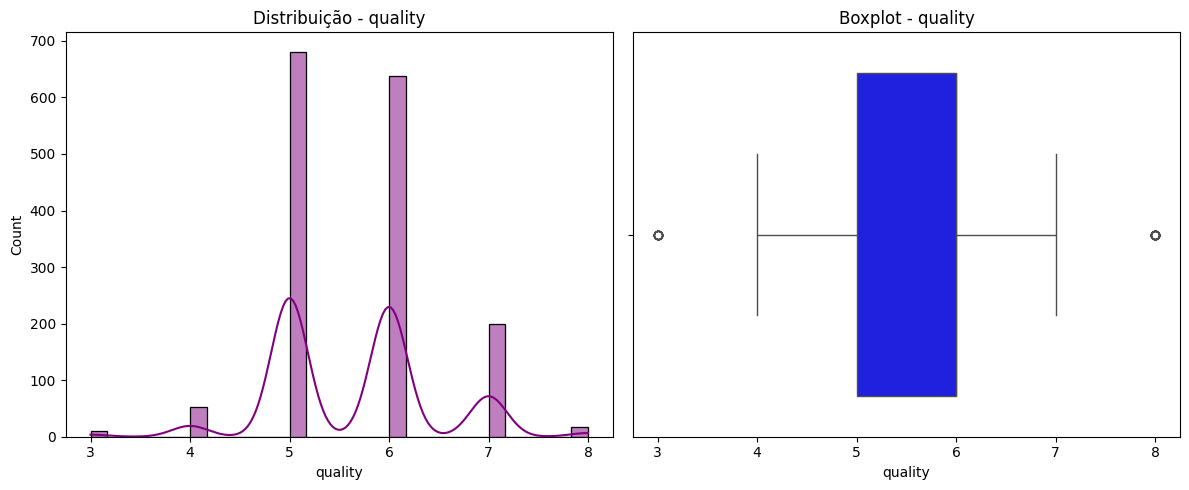

In [19]:
# Vou observar com bloxplot as variáveis residual_sugar, free_sulfur_dioxide e total_sulfur_dioxide pois o desvio padrão está com um valor elevado referente a média,
#    nos mostrando que pode haver uma grande quantidade de outliers, então cabe aqui uma observação mais profunda

# grafo_bloco_boxplot(df=df, colunas=df.columns, start=1)

grafo_dist_boxplot(df=df, colunas=df.columns)

#### Práticamente todos atributos retirados do dataset para produção de vinho tem valores de outliers, no processo de treinamento dos modelos todos os dados serão padronizados e normalizados, para que assim podemos obter o melhor resultado de nossos modelos.

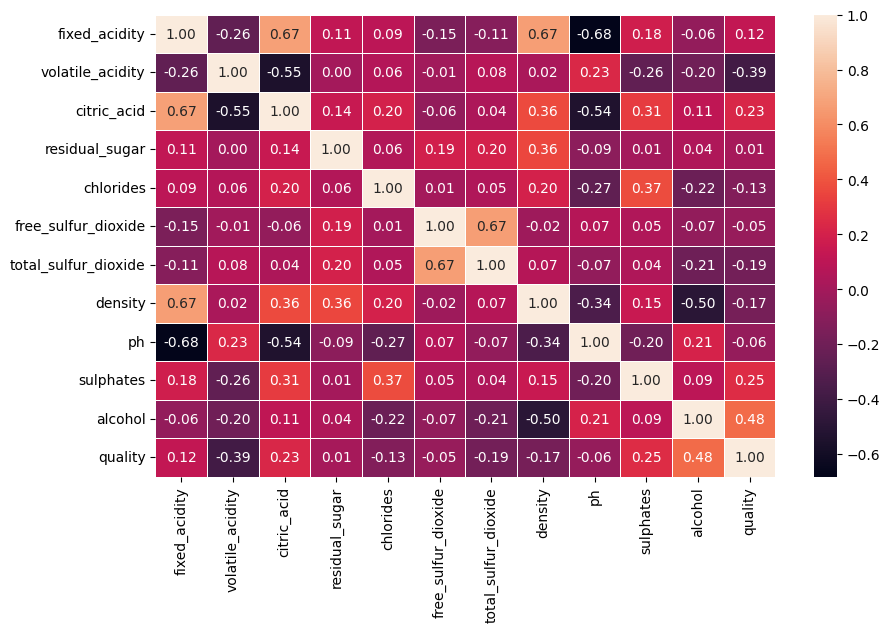

In [12]:
# Observando as correlações entre os dados.

grafo_heatmap(df=df)

#### As correlações entre os componentes para produção do vinhos, irão nos ajudar em observar se realmente conseguiremos obter valores satisfatórios na hora de produzir nossos vinhos.